In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
directory = 'notebooks'
dataframes = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

In [31]:
combined_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [32]:
print(combined_df.describe())

                SNo          High           Low          Open         Close  \
count  37082.000000  37082.000000  37082.000000  37082.000000  37082.000000   
mean    1056.699018   1016.058015    952.987707    985.323755    987.120511   
std      755.992373   5249.503670   4907.932082   5088.101367   5093.703878   
min        1.000000      0.000089      0.000079      0.000086      0.000086   
25%      420.000000      0.075664      0.069536      0.072456      0.072648   
50%      910.000000      1.008733      0.999850      1.001157      1.001138   
75%     1585.000000     31.916399     28.996246     30.459673     30.512205   
max     2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  3.708200e+04  3.708200e+04  
mean   3.022542e+09  1.542943e+10  
std    1.190963e+10  7.059128e+10  
min    0.000000e+00  0.000000e+00  
25%    4.937190e+06  2.395955e+08  
50%    8.512805e+07  1.405335e+09  
75%    9.388489e+08  5.159305e+09  


In [33]:
print(combined_df.shape)

(37082, 10)


In [34]:
print(combined_df.head())

   SNo  Name Symbol                 Date       High        Low       Open  \
0    1  Aave   AAVE  2020-10-05 23:59:59  55.112358  49.787900  52.675035   
1    2  Aave   AAVE  2020-10-06 23:59:59  53.402270  40.734578  53.291969   
2    3  Aave   AAVE  2020-10-07 23:59:59  42.408314  35.970690  42.399947   
3    4  Aave   AAVE  2020-10-08 23:59:59  44.902511  36.696057  39.885262   
4    5  Aave   AAVE  2020-10-09 23:59:59  47.569533  43.291776  43.764463   

       Close        Volume     Marketcap  
0  53.219243  0.000000e+00  8.912813e+07  
1  42.401599  5.830915e+05  7.101144e+07  
2  40.083976  6.828342e+05  6.713004e+07  
3  43.764463  1.658817e+06  2.202651e+08  
4  46.817744  8.155377e+05  2.356322e+08  


In [35]:
combined_df.rename(columns={'Date': 'Timestamp'}, inplace=True)

In [36]:
# Convert the 'Date' column to a datetime format
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Convert 'Date' to 'YYYY-MM-DD' format
combined_df['Timestamp'] = combined_df['Timestamp'].dt.date

In [46]:
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])

# Define the start and end dates as datetime objects
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-06-30')

# Step 1: Filter data for the specified period
filtered_df = combined_df[(combined_df['Timestamp'] >= start_date) & (combined_df['Timestamp'] <= end_date)].copy()  # Make a copy to avoid the warning

# Step 2: Calculate daily returns for each cryptocurrency
filtered_df['Daily_Return'] = filtered_df.groupby('Name')['Close'].pct_change()

In [47]:
# Step 3: Calculate the correlation matrix between daily returns
correlation_matrix = filtered_df.pivot_table(index='Timestamp', columns='Name', values='Daily_Return', aggfunc='sum').corr()

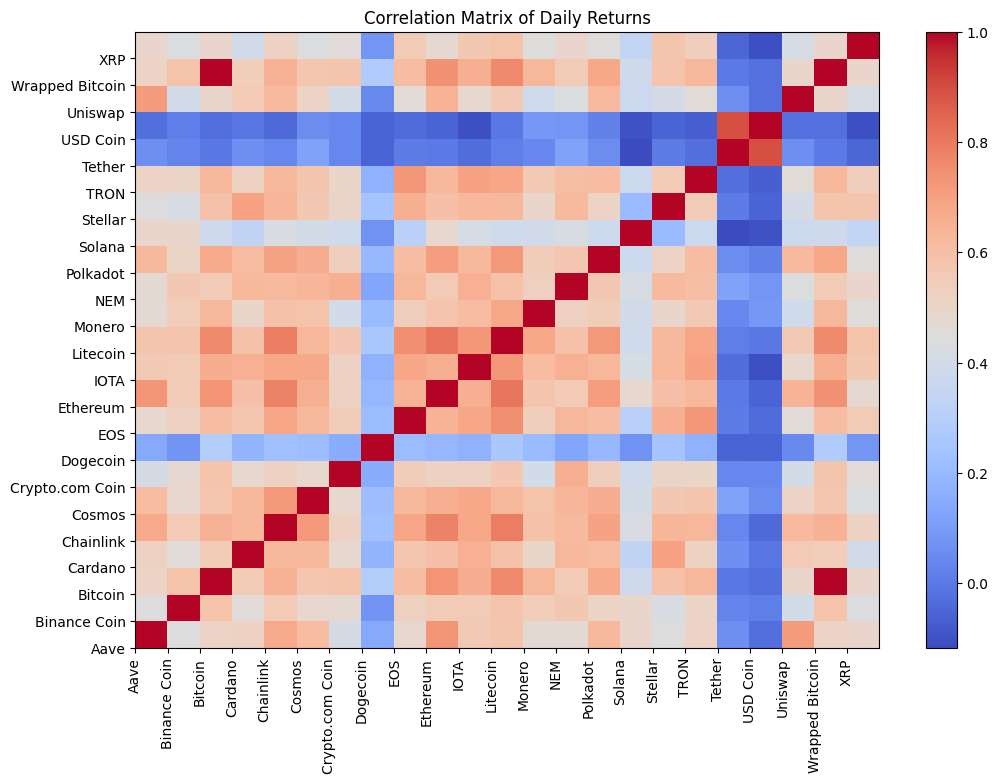

In [51]:
plt.figure(figsize=(12, 8))
heatmap = plt.pcolor(correlation_matrix, cmap='coolwarm')
plt.colorbar(heatmap)

# Customize the heatmap
plt.title('Correlation Matrix of Daily Returns')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [ ]:
## Cryptocurrencies: The rows and columns of the chart represent different cryptocurrencies. Each cryptocurrency is compared to itself and every other cryptocurrency in the dataset. The names of the cryptocurrencies are shown on both the X and Y axes.

## Color Intensity: The color intensity in the heatmap cells represents the strength of the correlation between the daily returns of two cryptocurrencies. Positive correlations are typically shown in lighter colors, while negative correlations are in darker colors. The color scale is often defined with a color bar.

## Correlation Value: By hovering over the cells or referring to the color bar, you can determine the specific correlation value between pairs of cryptocurrencies. The correlation coefficient quantifies the strength and direction of the relationship. A value of 1 represents a perfect positive correlation, -1 represents a perfect negative correlation, and 0 represents no correlation.

## Daily Returns: Daily returns, in this context, refer to the percentage change in the price of each cryptocurrency from one day to the next. It measures how much the price of a cryptocurrency goes up or down each day. Positive returns indicate price increases, while negative returns indicate price decreases. The correlation between daily returns tells you how closely the price movements of different cryptocurrencies are related.

## Interpreting the Correlation: A high positive correlation (values close to 1) between two cryptocurrencies means that they tend to move in the same direction. When one goes up, the other usually goes up as well. A high negative correlation (values close to -1) indicates that they tend to move in opposite directions. If one goes up, the other tends to go down. A correlation close to 0 suggests little to no linear relationship; their price movements are not strongly related.

## In summary, the heatmap of daily returns and correlations helps you understand how various cryptocurrencies are related in terms of their price movements. It's a useful tool for diversifying a portfolio, managing risk, and understanding how assets may interact during trading or investment.